# Predicting Forest Fires in Brasil


# 1. Inspecting the data
Loading and inspecting the dataset.

In [91]:
# Loading Dataset

import pandas as pd
from pandas import read_csv


df = pd.read_csv("amazon.csv", encoding="latin1")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [92]:
df

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [93]:
df.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


### 1.1 Inspecting State and Month
The higher the bar, the higher the margin of error

C:\Users\thezo\AppData\Local\Temp\ipykernel_8840\2461440572.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


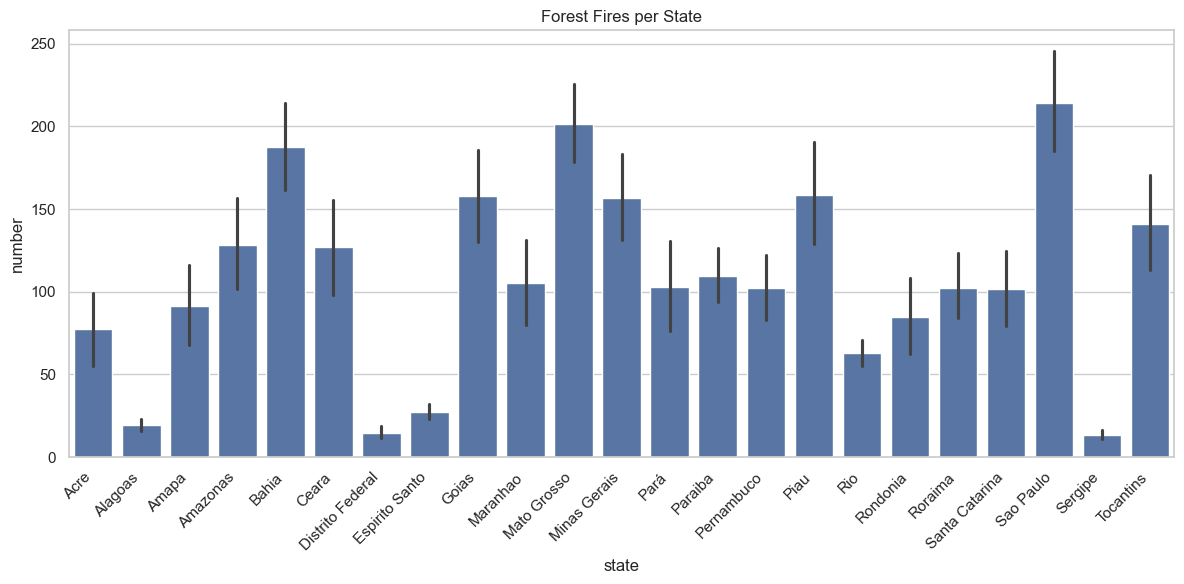

In [94]:
# Plot forest fires per state
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
 
plt.figure(figsize=(12,6))
ax = sns.barplot(x='state', y='number', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title("Forest Fires per State")
plt.tight_layout()
plt.show()

C:\Users\thezo\AppData\Local\Temp\ipykernel_8840\4268077021.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


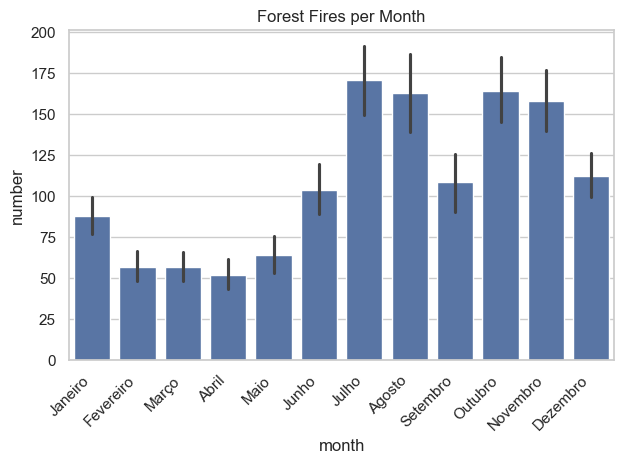

In [95]:
# Plot forest fires per Month
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
 
ax = sns.barplot(x='month', y='number', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title("Forest Fires per Month")
plt.tight_layout()
plt.show()

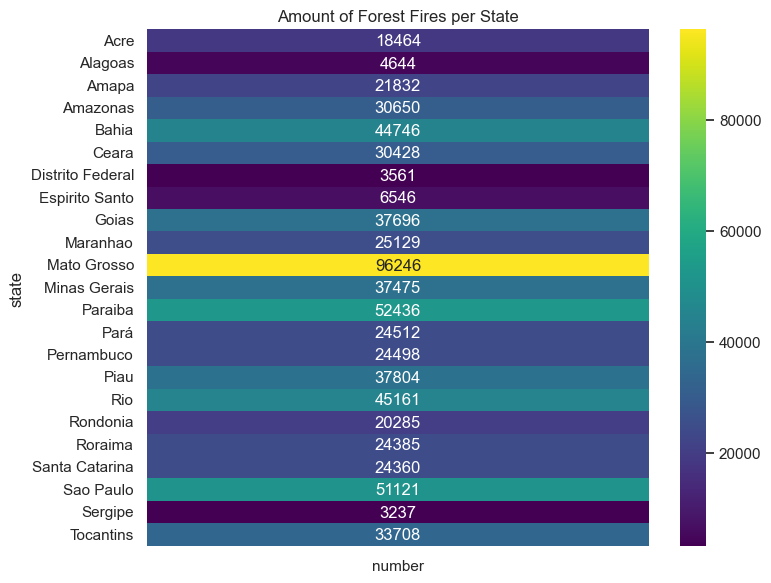

In [96]:
# Correlatie tussen staten en nummers: pivot en heatmap
state_number = df.pivot_table(index='state', values='number', aggfunc='sum')
plt.figure(figsize=(8,6))
sns.heatmap(state_number, annot=True, cmap='viridis', fmt='.0f')
plt.title('Amount of Forest Fires per State')
plt.tight_layout()
plt.show()

### 1.2 Overall Acknowledgements
- There are multiple columns which have `object` as data type
    - The columns `state` and `month` are objects, but we can one-hot encode this
    - The column `date` can be converted to datetime
    - The column `date` is the report date, not necessarily the date of the forest fire
    - The column `date` is identical to year
- There is no missing data
- The column `number` indicates how many fires there were on the specified data (This number can also be 0)

# 2. Cleaning and Augmenting the data
To make the data more suitable for machine learning we will take the following actions
- Remove `date` from the dataset
- One-hot encode state
- Map months to numbers 1-12 (consider one hot encoding if results are bad)

In [97]:
# Load data
df = pd.read_csv("amazon.csv", encoding="latin1")

# Drop date column
df = df.drop('date', axis=1)

# onehot encoding state
df = pd.get_dummies(df, columns=['state'])

# Mapping months to numbers
month_map = {
    'Janeiro': 1,
    'Fevereiro': 2,
    'Março': 3,
    'Abril': 4,
    'Maio': 5,
    'Junho': 6,
    'Julho': 7,
    'Agosto': 8,
    'Setembro': 9,
    'Outubro': 10,
    'Novembro': 11,
    'Dezembro': 12
}
 
df['month'] = df['month'].map(month_map)
df.head()

,year,month,number,state_Acre,state_Alagoas,state_Amapa,state_Amazonas,state_Bahia,state_Ceara,state_Distrito Federal,...,state_Pará,state_Pernambuco,state_Piau,state_Rio,state_Rondonia,state_Roraima,state_Santa Catarina,state_Sao Paulo,state_Sergipe,state_Tocantins
0,1998,1,0.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1999,1,0.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2000,1,0.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2001,1,0.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2002,1,0.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


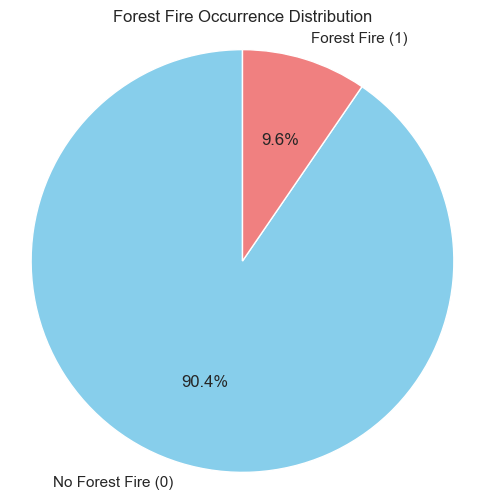

In [98]:
import matplotlib.pyplot as plt

# convert to 0 or 1
X = (df['number'] > 0).astype(int)

# Count the number of 0s and 1s
value_counts = X.value_counts()

# Labels for pie chart
labels = ['No Forest Fire (0)', 'Forest Fire (1)']

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(value_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title("Forest Fire Occurrence Distribution")
plt.axis('equal')  # Equal aspect ratio to ensure circle
plt.show()


# 3. Modelling

### 3.1 Predicting the amount of Forest Fires
How many fires?

In [99]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define features and Target
X = df.drop('number', axis=1)
y = df['number']

# booleans to int
X = X.astype(int)

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Train
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

import math
sqrt = math.sqrt(mse)
print(f"Root of MSE: {sqrt}")

MSE: 25723.721108040925
Root of MSE: 160.38616245811522


### 3.2 Predicting IF there will be a Forest Fire
Will there be a forest fire?

In [100]:
df['number'] = (df['number'] > 0).astype(int)
df

,year,month,number,state_Acre,state_Alagoas,state_Amapa,state_Amazonas,state_Bahia,state_Ceara,state_Distrito Federal,...,state_Pará,state_Pernambuco,state_Piau,state_Rio,state_Rondonia,state_Roraima,state_Santa Catarina,state_Sao Paulo,state_Sergipe,state_Tocantins
0,1998,1,0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1999,1,0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2000,1,0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2001,1,0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2002,1,0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6449,2012,12,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6450,2013,12,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6451,2014,12,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6452,2015,12,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


### 3.2.1 RandomForestRegressor

In [101]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define features and Target
X = df.drop('number', axis=1)
y = df['number']

# booleans to int
X = X.astype(int)

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Train
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

import math
sqrt = math.sqrt(mse)
print(f"Root of MSE: {sqrt}")

MSE: 0.05455274703379932
Root of MSE: 0.23356529501147924


### 3.2.2 RandomForestClassifier

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define features and Target
X = df.drop('number', axis=1)
y = df['number']

# booleans to int
X = X.astype(int)

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Train
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
# Scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Full classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.9280
Precision: 0.9524
Recall: 0.9680
F1 Score: 0.9601

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.58      0.63       134
           1       0.95      0.97      0.96      1157

    accuracy                           0.93      1291
   macro avg       0.82      0.78      0.79      1291
weighted avg       0.92      0.93      0.93      1291



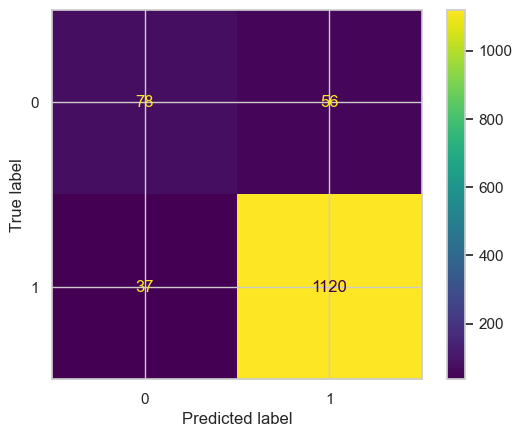

In [103]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.ensemble import RandomForestClassifier

# Define features and binary target (is_forest_fire)
X = df.drop('number', axis=1)
y = df['number']

# Make sure all data is numeric
X = X.astype(int)

# Define model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Cross-validation setup
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Run cross-validation with multiple scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1'] # look for recall
scores = cross_validate(model, X, y, cv=cv, scoring=scoring)

# Print average scores
print("Average Scores (5-fold cross-validation):")
print(f"Accuracy : {scores['test_accuracy'].mean():.4f}")
print(f"Precision: {scores['test_precision'].mean():.4f}")
print(f"Recall   : {scores['test_recall'].mean():.4f}")
print(f"F1 Score : {scores['test_f1'].mean():.4f}")


Average Scores (5-fold cross-validation):
Accuracy : 0.9331
Precision: 0.9540
Recall   : 0.9729
F1 Score : 0.9633


### 3.3 Modelling with One-hot Encoded Months

In [105]:
# Loading Dataset

import pandas as pd
from pandas import read_csv

# load data
df = pd.read_csv("amazon.csv", encoding="latin1")

# drop date column
df = df.drop('date', axis=1)

# onehot encoding state
df = pd.get_dummies(df, columns=['state'])

# one hot encode month
df = pd.get_dummies(df, columns=['month'])

# number to 0 or 1
df['number'] = (df['number'] > 0).astype(int)


df


,year,number,state_Acre,state_Alagoas,state_Amapa,state_Amazonas,state_Bahia,state_Ceara,state_Distrito Federal,state_Espirito Santo,...,month_Dezembro,month_Fevereiro,month_Janeiro,month_Julho,month_Junho,month_Maio,month_Março,month_Novembro,month_Outubro,month_Setembro
0,1998,0,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,1999,0,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,2000,0,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,2001,0,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,2002,0,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6449,2012,1,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
6450,2013,1,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
6451,2014,1,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
6452,2015,1,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define features and Target
X = df.drop('number', axis=1)
y = df['number']

# booleans to int
X = X.astype(int)

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Train
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
# Scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Full classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.9287
Precision: 0.9547
Recall: 0.9663
F1 Score: 0.9605

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.60      0.64       134
           1       0.95      0.97      0.96      1157

    accuracy                           0.93      1291
   macro avg       0.81      0.79      0.80      1291
weighted avg       0.93      0.93      0.93      1291

